In [2]:
!pip install yfinance


In [1]:
# Step 1: Install yfinance
!pip install yfinance

# Step 2: Import necessary libraries
import yfinance as yf
import pandas as pd

# Step 3: Download AAPL stock data from Yahoo Finance (last 5 years)
df = yf.download('AAPL', start='2020-04-01', end='2025-04-01')

# Step 4: Reset index so 'Date' becomes a column
df.reset_index(inplace=True)

# Step 5: Display first few rows
print("✅ AAPL Stock Data (5 Years):")
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

✅ AAPL Stock Data (5 Years):


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-04-01,58.387241,60.280082,57.955839,59.742040,176218400
1,2020-04-02,59.361526,59.414846,57.415366,58.249089,165934000
2,2020-04-03,58.508415,59.548143,57.917053,58.845297,129880000
3,2020-04-06,63.612549,63.767656,60.440041,60.808428,201820400
4,2020-04-07,62.875759,65.849536,62.771546,65.631405,202887200


In [3]:
# Save to CSV file (optional)
df.to_csv('AAPL_5Y_data.csv', index=False)


         Date              Close                High                Low  \
0         NaN               AAPL                AAPL               AAPL   
1  2020-04-01  58.38724136352539   60.28008186649483  57.95583869541803   
2  2020-04-02  59.36152648925781   59.41484624870322  57.41536636391571   
3  2020-04-03  58.50841522216797  59.548143090432646  57.91705333235699   
4  2020-04-06    63.612548828125   63.76765616071226  60.44004138982213   

                 Open     Volume  
0                AAPL       AAPL  
1   59.74203967177421  176218400  
2    58.2490894772747  165934000  
3  58.845297125214294  129880000  
4   60.80842777645955  201820400  


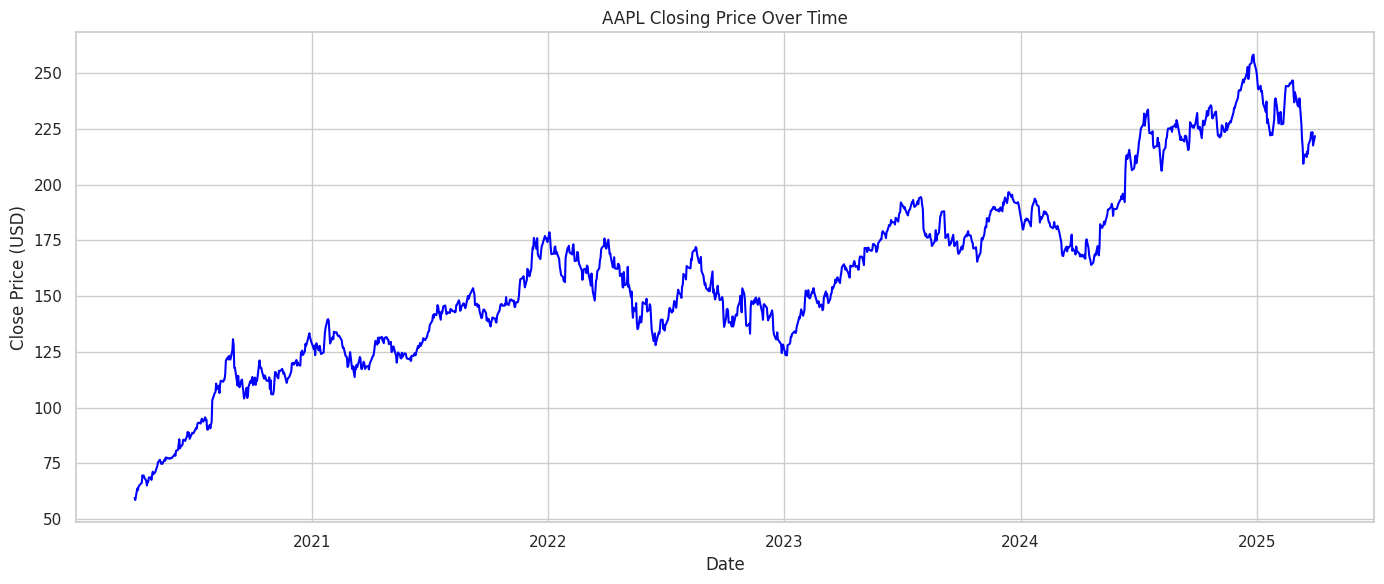

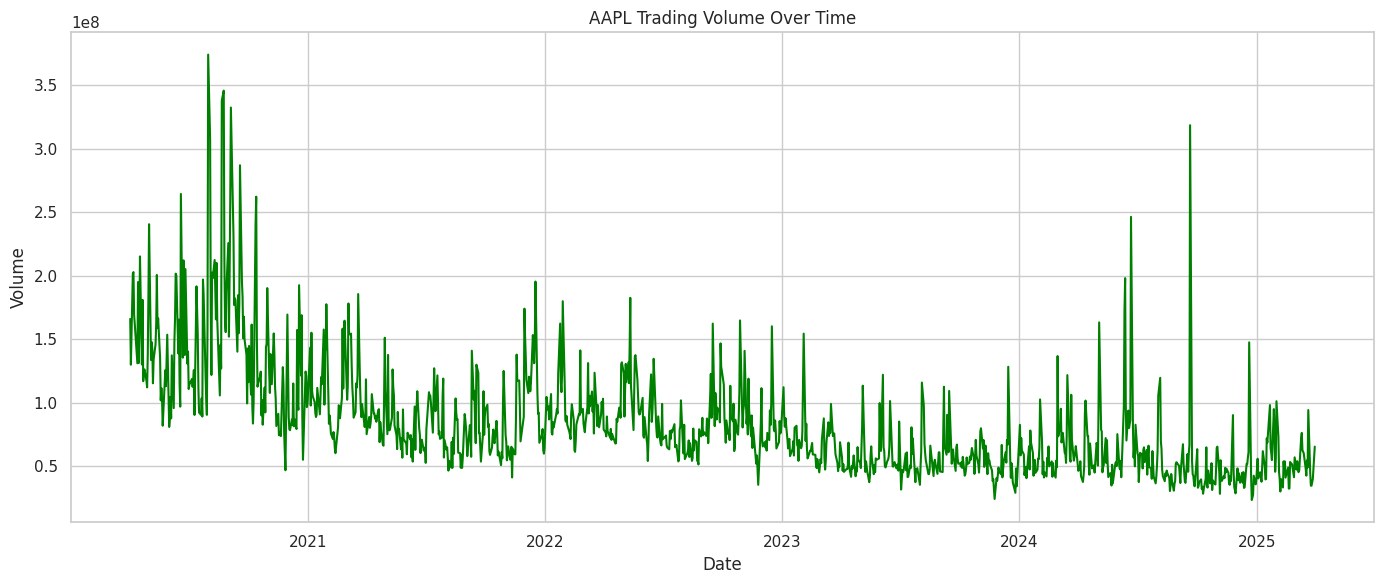

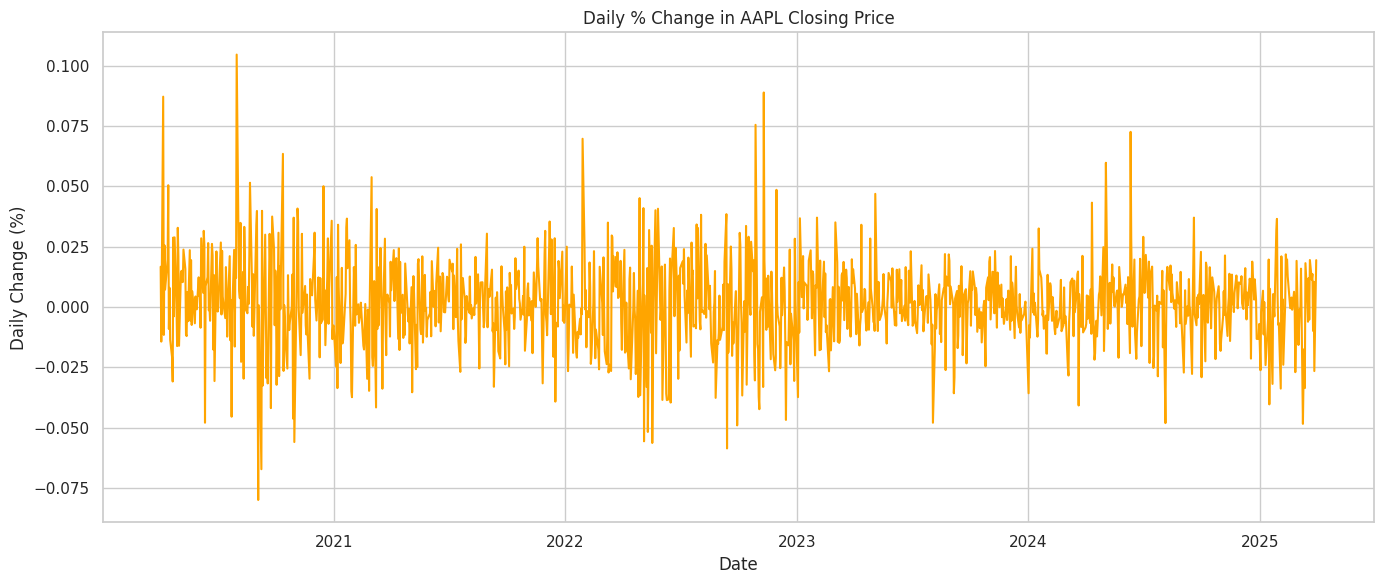

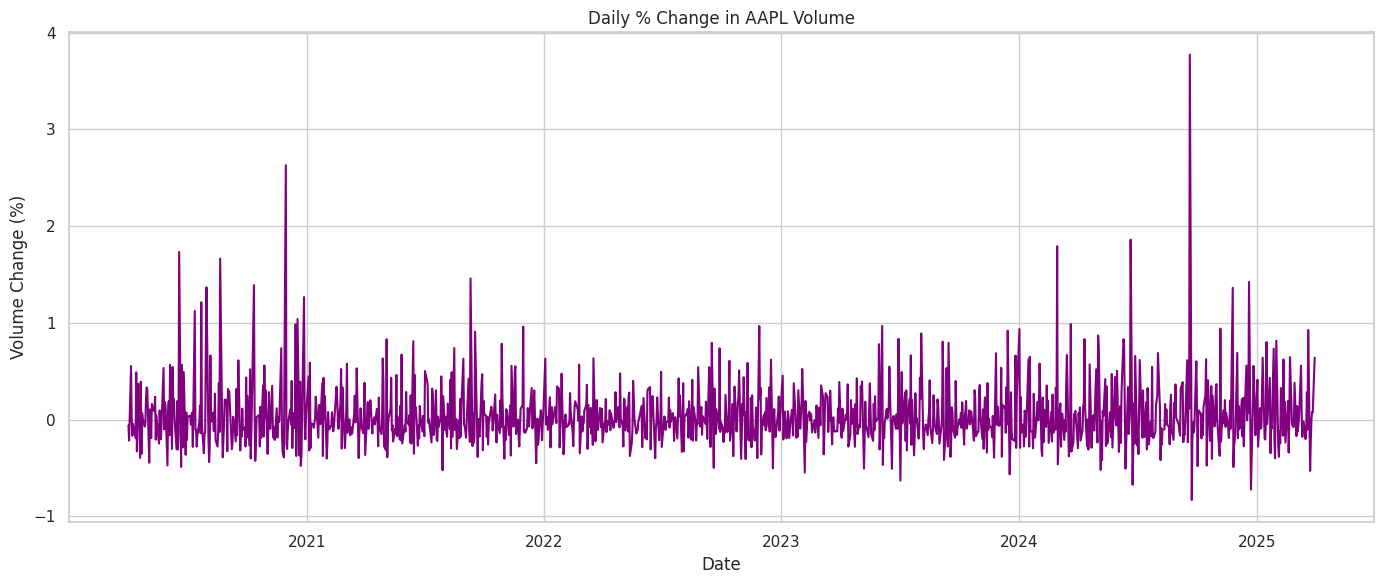

In [4]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the CSV file
file_path = '/content/AAPL_5Y_data.csv'
df = pd.read_csv(file_path)

# ✅ Preview the top rows
print(df.head())

# ✅ Clean data: remove rows where 'Close' or 'Volume' are not numeric
df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Volume'], errors='coerce').notnull()]

# ✅ Convert types properly
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# ✅ Feature Engineering
df['Daily_Change'] = df['Close'].pct_change()
df['Volume_Change'] = df['Volume'].pct_change()
df.dropna(inplace=True)

# ✅ Set Seaborn style
sns.set(style='whitegrid')

# ✅ Plot 1: Closing Price Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Close'], color='blue')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.tight_layout()
plt.show()

# ✅ Plot 2: Trading Volume Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Volume'], color='green')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

# ✅ Plot 3: Daily % Change in Price
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Daily_Change'], color='orange')
plt.title('Daily % Change in AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.tight_layout()
plt.show()

# ✅ Plot 4: Daily % Change in Volume
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Volume_Change'], color='purple')
plt.title('Daily % Change in AAPL Volume')
plt.xlabel('Date')
plt.ylabel('Volume Change (%)')
plt.tight_layout()
plt.show()


Mean Squared Error: 11.61020124232959
R² Score: 0.9772850467155939
          Actual   Predicted
1005  169.009277  170.409210
1006  167.826416  169.032935
1007  168.631561  167.841999
1008  167.806564  168.614650
1009  168.561981  167.804650


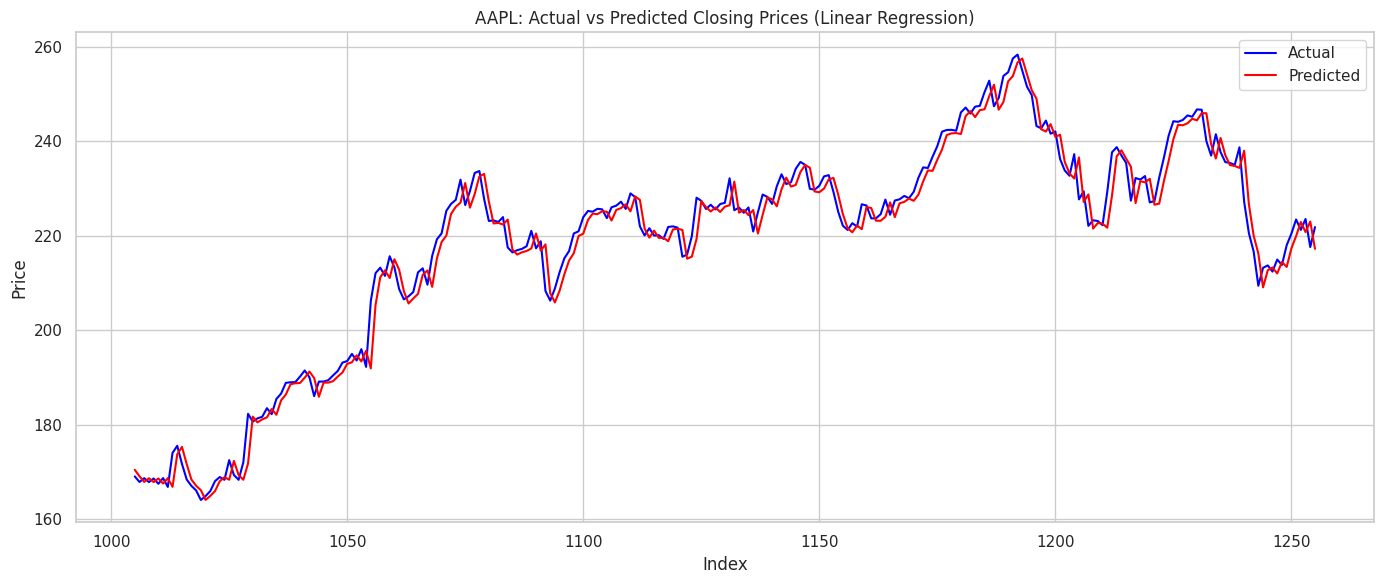

In [5]:
# 📦 Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ Load and Clean Data Again (if needed)
df = pd.read_csv('/content/AAPL_5Y_data.csv')
df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Volume'], errors='coerce').notnull()]
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df['Daily_Change'] = df['Close'].pct_change()
df['Volume_Change'] = df['Volume'].pct_change()
df.dropna(inplace=True)

# ✅ Lag Feature: Predict next day’s Close using current day's data
df['Close_Next'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# ✅ Features and Target
features = ['Close', 'Volume', 'Daily_Change', 'Volume_Change']
target = 'Close_Next'

X = df[features]
y = df[target]

# ✅ Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Make Predictions
y_pred = model.predict(X_test)

# ✅ Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# ✅ Display actual vs predicted in a DataFrame
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}, index=y_test.index)
print(results.head())

# ✅ Optional: Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='red')
plt.title('AAPL: Actual vs Predicted Closing Prices (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
# 📦 Libraries
import numpy as np

# ✅ Simulate sentiment scores (range: -1 to 1) for demo
np.random.seed(42)
df['Sentiment'] = np.random.normal(loc=0, scale=0.3, size=len(df))  # Simulated sentiment values

# ✅ Clip scores to stay between -1 and 1
df['Sentiment'] = df['Sentiment'].clip(-1, 1)

# ✅ Add lagged sentiment score if needed
df['Sentiment_Lag'] = df['Sentiment'].shift(1)
df.dropna(inplace=True)

# ✅ Update features
features = ['Close', 'Volume', 'Daily_Change', 'Volume_Change', 'Sentiment', 'Sentiment_Lag']
target = 'Close_Next'

X = df[features]
y = df[target]

# ✅ Split data again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# ✅ Retrain with new features
model_sentiment = LinearRegression()
model_sentiment.fit(X_train, y_train)

# ✅ Predict and Evaluate
y_pred_sentiment = model_sentiment.predict(X_test)

mse_sent = mean_squared_error(y_test, y_pred_sentiment)
r2_sent = r2_score(y_test, y_pred_sentiment)

print("🔹 With Sentiment - MSE:", mse_sent)
print("🔹 With Sentiment - R² Score:", r2_sent)

# ✅ Results DataFrame
results_sent = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_sentiment}, index=y_test.index)


🔹 With Sentiment - MSE: 11.653770160196771
🔹 With Sentiment - R² Score: 0.9772594858017427


🌲 Random Forest - MSE: 1000.6186063381459
🌲 Random Forest - R² Score: -0.9576753601488734


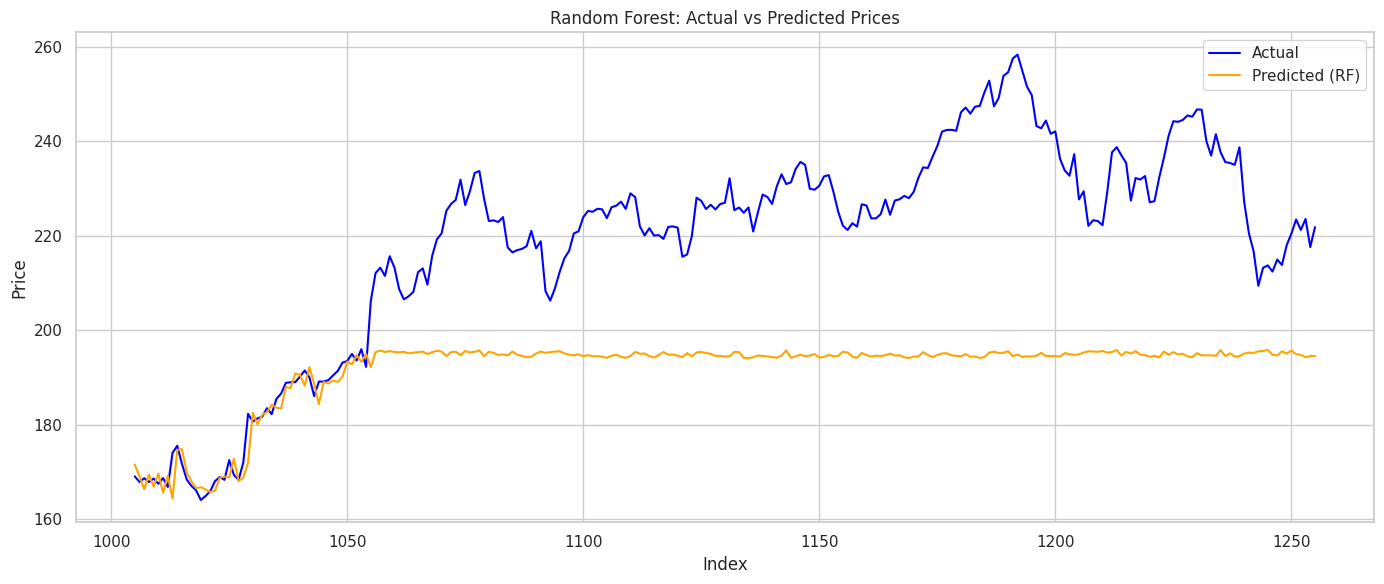

In [8]:
from sklearn.ensemble import RandomForestRegressor

# 🎯 Define and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📈 Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest - MSE:", mse_rf)
print("🌲 Random Forest - R² Score:", r2_rf)

# 📊 Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted (RF)', color='orange')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler

# 🧼 Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + ['Close_Next']])

# 🧠 Create sequences for LSTM
def create_lstm_dataset(data, time_step=10):
    X_lstm, y_lstm = [], []
    for i in range(time_step, len(data)):
        X_lstm.append(data[i-time_step:i, :-1])
        y_lstm.append(data[i, -1])
    return np.array(X_lstm), np.array(y_lstm)

time_step = 10
X_lstm, y_lstm = create_lstm_dataset(scaled_data, time_step)

# Split
split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 📐 Define model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 🏋️ Train model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0792
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.3253e-04
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.7465e-04
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0010
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.2452e-04
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6964e-04


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.2269 - val_loss: 0.0595
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0055 - val_loss: 0.0155
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.4717e-04 - val_loss: 0.0022
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.2042e-04 - val_loss: 0.0020
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.5494e-04 - val_loss: 0.0017
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.2136e-04 - val_loss: 0.0020
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.4094e-04 - val_loss: 0.0025
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.3411e-04 - val_loss: 0.0020
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.8652e-04 - val_loss: 0.0017
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms

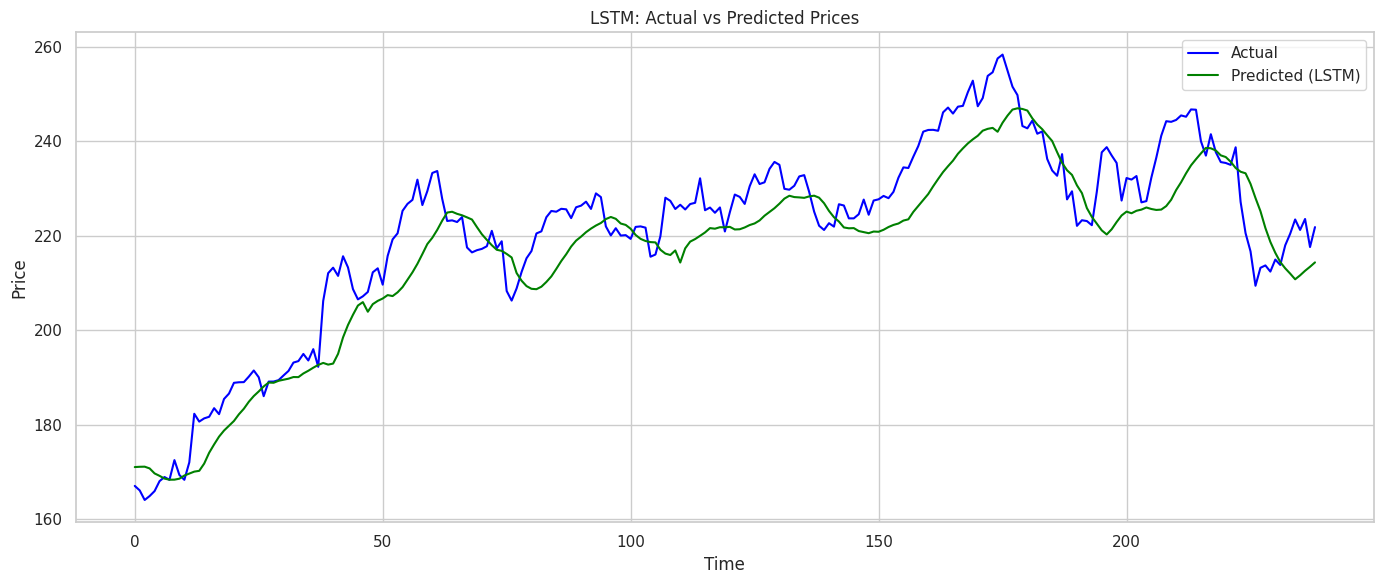

Mean Squared Error (MSE): 70.04849274538621


TypeError: 'History' object is not subscriptable

<Figure size 1400x600 with 0 Axes>

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
df = pd.read_csv('/content/AAPL_5Y_data.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as index
df.set_index('Date', inplace=True)

# Data cleaning: Remove rows with non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric values, coerce non-numeric to NaN
df = df.dropna()  # Drop rows with NaN values

# Feature Engineering: Create new column for next day's close price
df['Close_Next'] = df['Close'].shift(-1)
df = df.dropna()

# Selecting features for LSTM model
features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Exclude Close_Next
df_features = df[features]
df_target = df['Close_Next']

# Normalize the features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the features and target
scaled_features = feature_scaler.fit_transform(df_features)
scaled_target = target_scaler.fit_transform(df_target.values.reshape(-1, 1))

# Combine scaled features and target
scaled_data = np.concatenate((scaled_features, scaled_target), axis=1)

# LSTM dataset creation function
def create_lstm_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, :-1])  # All features except target
        y.append(data[i, -1])  # Target (Close_Next)
    return np.array(X), np.array(y)

# Time step for LSTM (number of previous days used for prediction)
time_step = 60

# Create LSTM dataset
X, y = create_lstm_dataset(scaled_data, time_step)

# Split dataset into train and test sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(units=1))  # Predicting the next day's closing price

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_lstm_rescaled = target_scaler.inverse_transform(y_pred_lstm)
y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted prices
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred_lstm_rescaled, label='Predicted (LSTM)', color='green')
plt.title('LSTM: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test_rescaled, y_pred_lstm_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Optional: Plot the training loss and validation loss during training
history = model_lstm.history
plt.figure(figsize=(14, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Plot feature importance (optional, if you'd like to analyze)
feature_importance = model_lstm.layers[0].get_weights()[0]
plt.figure(figsize=(14, 6))
plt.bar(df_features.columns, np.mean(feature_importance, axis=1))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


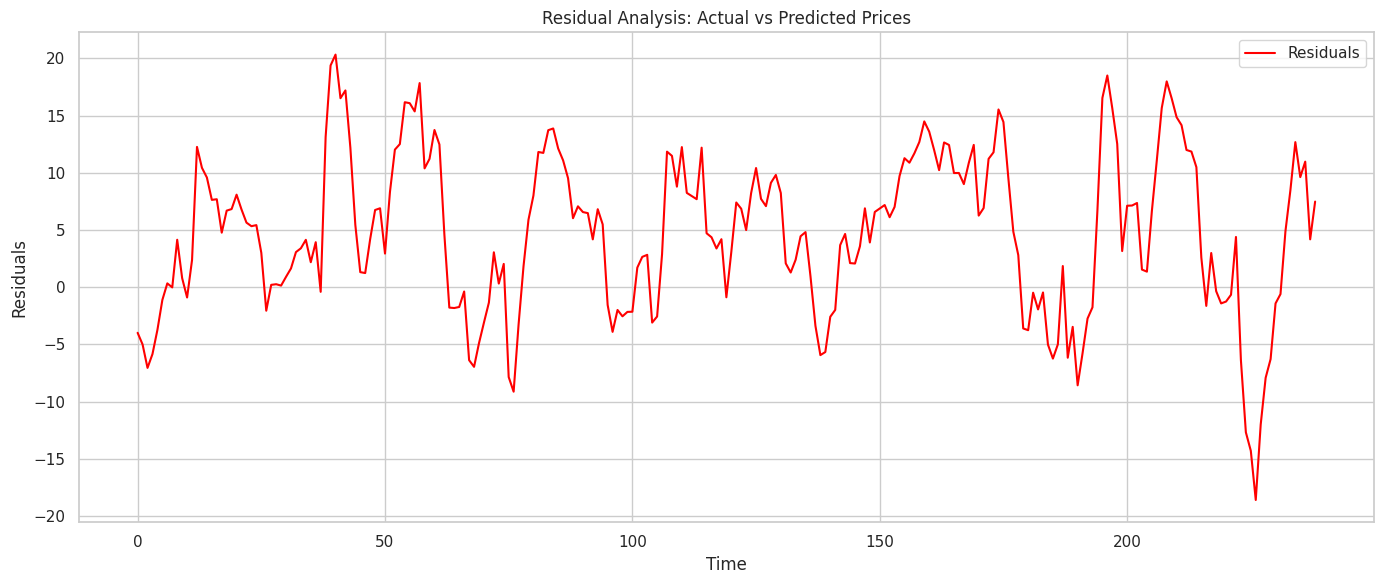

In [12]:
# Calculate residuals (errors) between actual and predicted prices
residuals = y_test_rescaled - y_pred_lstm_rescaled

# Plot residuals
plt.figure(figsize=(14, 6))
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residual Analysis: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

# Check for any patterns in the residuals (they should ideally be random)


Linear Regression Results:
MAE: 0.93, MSE: 1.61, RMSE: 1.27

Decision Tree Results:
MAE: 25.48, MSE: 900.18, RMSE: 30.00

Random Forest Results:
MAE: 25.95, MSE: 934.57, RMSE: 30.57

Support Vector Regressor Results:
MAE: 57.30, MSE: 4402.05, RMSE: 66.35



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
LSTM Results:
MAE: 186.14, MSE: 35167.86, RMSE: 187.53



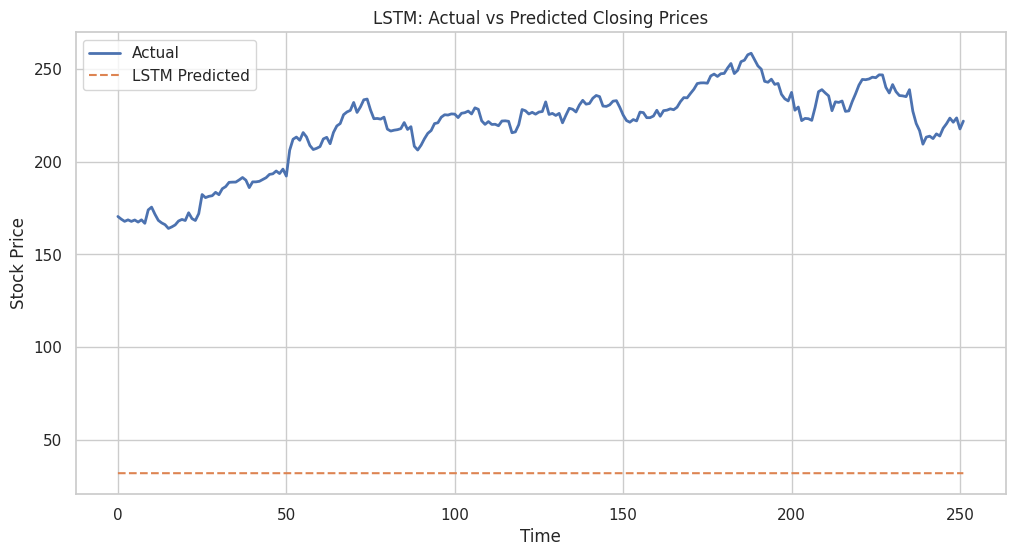

In [13]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import tensorflow as tf

# STEP 2: Load and clean data
df = pd.read_csv('/content/AAPL_5Y_data.csv')
df = df[1:]  # Remove the first row with headers
df = df.dropna()
df[['Close', 'High', 'Low', 'Open', 'Volume']] = df[['Close', 'High', 'Low', 'Open', 'Volume']].astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# STEP 3: Feature selection and preprocessing
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
X = df[features].values
y = df[target].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chronological train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}\n")
    return mae, mse, rmse

# STEP 4: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
evaluate_model("Linear Regression", y_test, lr_pred)

# STEP 5: Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
evaluate_model("Decision Tree", y_test, dt_pred)

# STEP 6: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
evaluate_model("Random Forest", y_test, rf_pred)

# STEP 7: Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
evaluate_model("Support Vector Regressor", y_test, svr_pred)

# STEP 8: LSTM Model Preparation
# LSTM requires 3D input: [samples, time steps, features]
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

X_train_seq = X_seq[:split_index - time_steps]
y_train_seq = y_seq[:split_index - time_steps]
X_test_seq = X_seq[split_index - time_steps:]
y_test_seq = y_seq[split_index - time_steps:]

# LSTM Model
lstm = Sequential()
lstm.add(LSTM(units=64, return_sequences=False, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
lstm.add(Dense(1))
lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
lstm.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, verbose=0)

lstm_pred = lstm.predict(X_test_seq).flatten()
evaluate_model("LSTM", y_test_seq, lstm_pred)

# Optional: Visualization
plt.figure(figsize=(12,6))
plt.plot(y_test_seq, label="Actual", linewidth=2)
plt.plot(lstm_pred, label="LSTM Predicted", linestyle='dashed')
plt.title("LSTM: Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


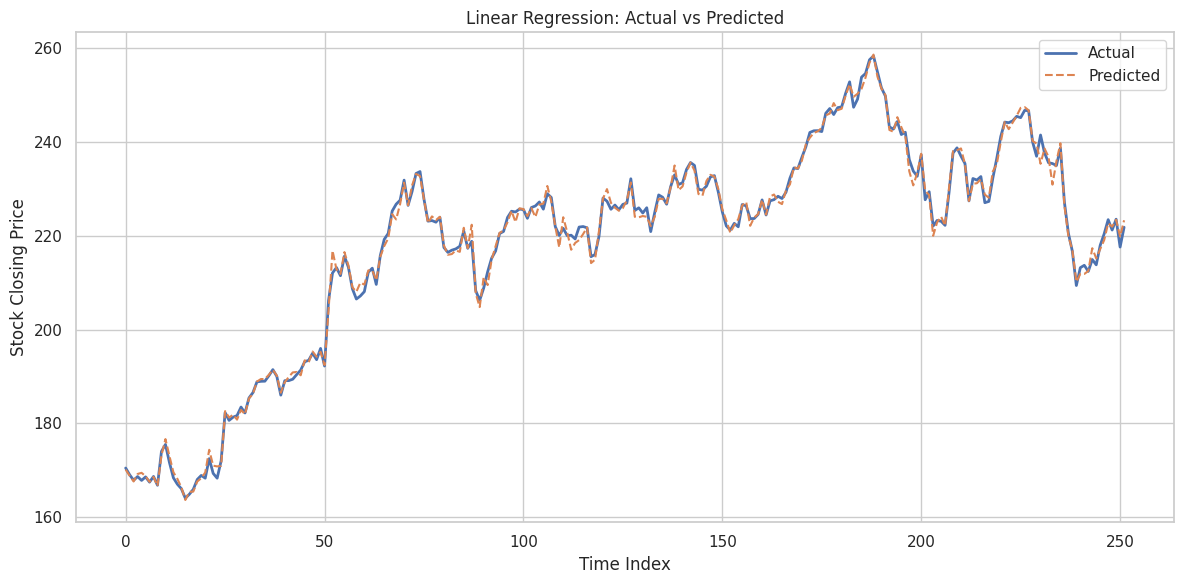

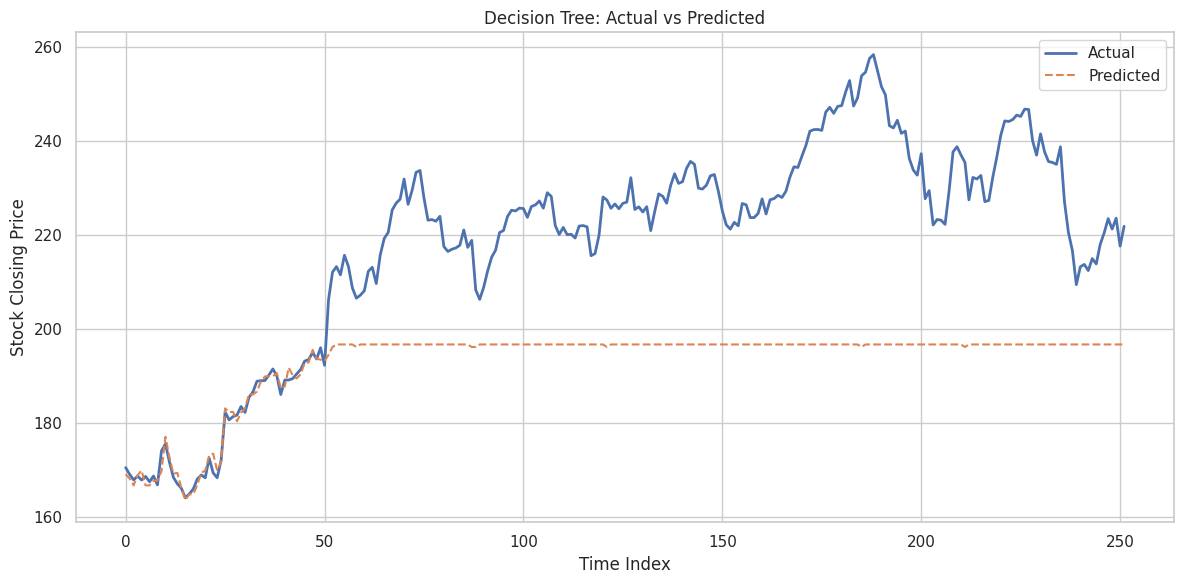

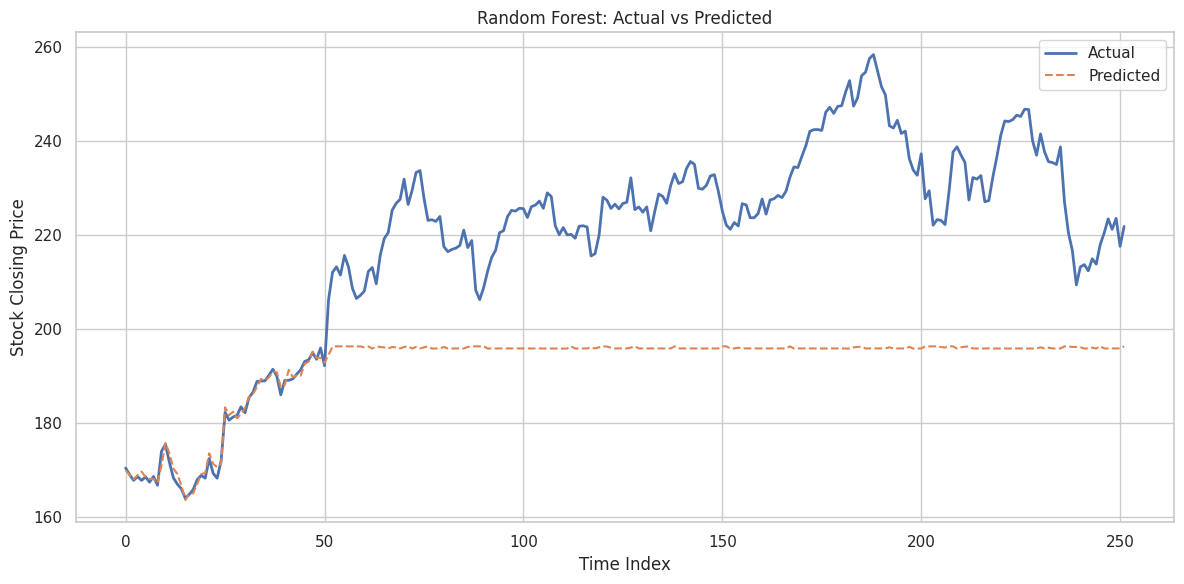

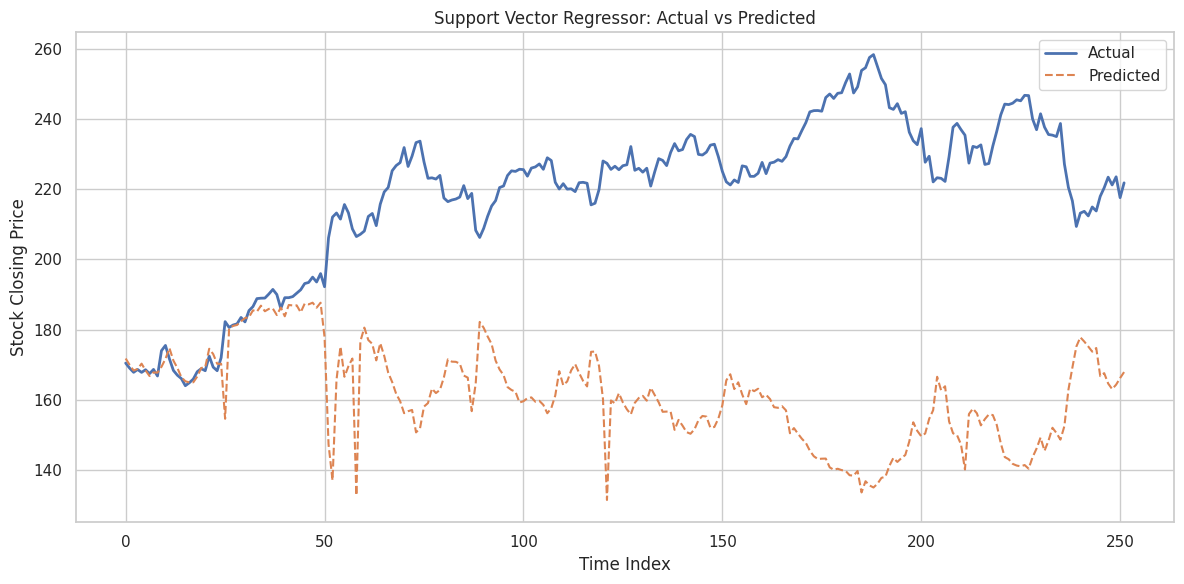

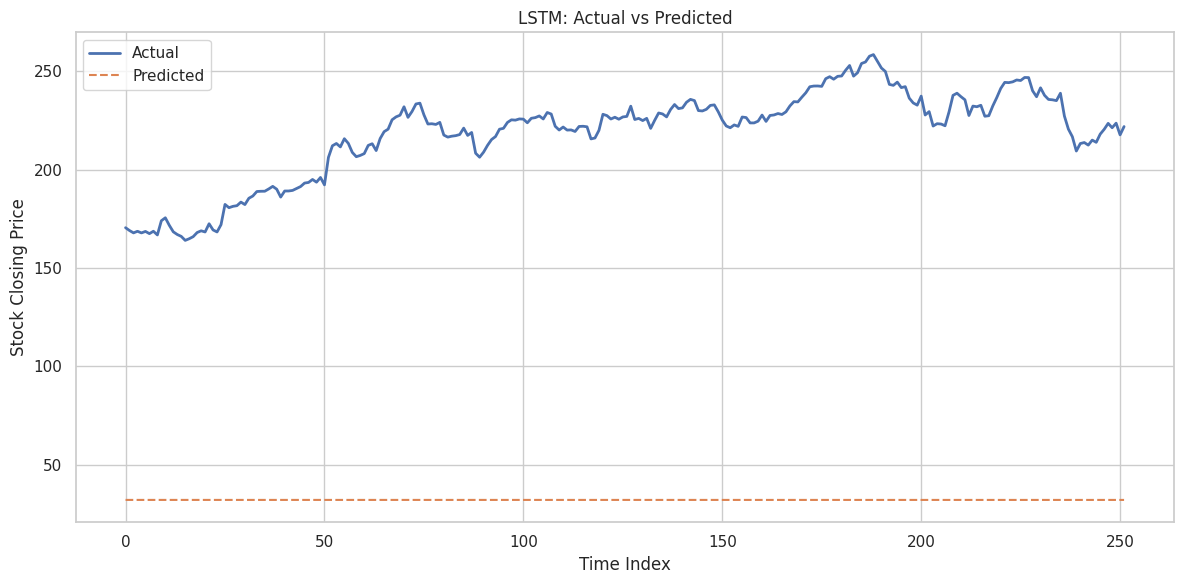

In [14]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual', linewidth=2)
    plt.plot(y_pred, label='Predicted', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Time Index')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Linear Regression
plot_predictions(y_test, lr_pred, "Linear Regression: Actual vs Predicted")

# Decision Tree
plot_predictions(y_test, dt_pred, "Decision Tree: Actual vs Predicted")

# Random Forest
plot_predictions(y_test, rf_pred, "Random Forest: Actual vs Predicted")

# Support Vector Regressor
plot_predictions(y_test, svr_pred, "Support Vector Regressor: Actual vs Predicted")

# LSTM
plot_predictions(y_test_seq, lstm_pred, "LSTM: Actual vs Predicted")


In [15]:
pip install yfinance scikit-learn matplotlib pandas gradio


In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import gradio as gr
import datetime

def forecast_stock(ticker):
    try:
        # Fetch last 180 days of stock data
        df = yf.download(ticker, period="180d")
        if df.empty:
            return "Invalid ticker or no data found.", None

        # Reset index for plotting
        df.reset_index(inplace=True)

        # Prepare features and labels
        df['Days'] = np.arange(len(df))  # Sequential day index
        X = df[['Days']]
        y = df['Close']

        # Train linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Predict next 7 days
        future_days = np.arange(len(df), len(df) + 7).reshape(-1, 1)
        future_prices = model.predict(future_days)

        # Create forecast DataFrame
        future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
        forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_prices})

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'], df['Close'], label='Historical Close', linewidth=2)
        plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecast (7 days)', linestyle='--', marker='o')
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.title(f"{ticker.upper()} Stock Forecast")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Save and return plot
        plt.savefig("forecast_plot.png")
        plt.close()
        return f"Forecast for {ticker.upper()} generated.", "forecast_plot.png"

    except Exception as e:
        return str(e), None

# Gradio Interface
interface = gr.Interface(
    fn=forecast_stock,
    inputs=gr.Textbox(label="Enter Stock Ticker Symbol (e.g., AAPL, GOOGL)"),
    outputs=[
        gr.Textbox(label="Status"),
        gr.Image(type="filepath", label="Stock Forecast Plot")
    ],
    title="📈 Stock Forecast App",
    description="Enter a valid stock ticker (from Yahoo Finance) to see historical trends and a 7-day forecast using linear regression."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f4cc2f225139d7a5c0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import gradio as gr

def forecast_stock(ticker):
    try:
        # Fetch last 180 days of stock data
        df = yf.download(ticker, period="180d")
        if df.empty:
            return "Invalid ticker or no data found.", None

        df.reset_index(inplace=True)

        # Prepare features and labels
        df['Days'] = np.arange(len(df))  # Day index
        X = df[['Days']]
        y = df['Close']

        # Train model
        model = LinearRegression()
        model.fit(X, y)

        # Predict next 7 days
        future_days = np.arange(len(df), len(df) + 7).reshape(-1, 1)
        future_prices = model.predict(future_days).ravel()  # Fix: flatten the array

        # Build forecast DataFrame
        future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
        forecast_df = pd.DataFrame({
            'Date': future_dates,
            'Predicted_Close': future_prices
        })

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'], df['Close'], label='Historical Close', linewidth=2)
        plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecast (7 days)', linestyle='--', marker='o')
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.title(f"{ticker.upper()} Stock Forecast")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        plt.savefig("forecast_plot.png")
        plt.close()
        return f"Forecast for {ticker.upper()} generated.", "forecast_plot.png"

    except Exception as e:
        return f"Error: {str(e)}", None

# Gradio UI
interface = gr.Interface(
    fn=forecast_stock,
    inputs=gr.Textbox(label="Enter Stock Ticker Symbol (e.g., AAPL, GOOGL)"),
    outputs=[
        gr.Textbox(label="Status"),
        gr.Image(type="filepath", label="Stock Forecast Plot")
    ],
    title="📈 Stock Forecast App",
    description="Enter a valid stock ticker (from Yahoo Finance) to see historical trends and a 7-day forecast using linear regression."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8ee71895c89eaba170.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
